# Machine Learning: Time Series Forecasting

## 1. Introduction
### 1.1 Definitions
A _time series_ is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Time series are very frequently plotted via a temporal line chart (where the horizontal axis is the time and vertical axis is the observed metric). Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, engineering and machine learning  where a observation involves temporal measurements.

_Time series analysis_ comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values. In general, data analysis with a time feature is called _time series analysis_ and data analysis without one is called _cross-section analysis_. Although time series analysis is also part of supervised learning, which includes regression and classification, it has differing assumptions.

Time series analysis can either be about a _single series_ or about _multivariate series_. Machine learning tasks for single series data are time series annotation (e.g. outlier/anomaly detection, segmentation) and most prominently forecasting. Multivariate time series analysis can be subdivided into either 1) mulitple series of measurements from a single unit or entity or 2) panel data where multiple series of measurements from multiple entities are observed. Machine learning tasks for multivariate series data include time series annotation (with additional variables), forecasting with exogenous variables, panel-data supervised forecasting, "Series-as-features" learning tasks (time series classification & regression).

### 1.2 Statistical Assumptions
An intrinsic characteristic of time series is that observations are statistically depend on past observations (while in cross-section, observations are assumed to be independent from one another). Thus, time series data does not fit into the standard machine learning setting where we assume to have _independent and identically distributed instances_ (i.i.d.). Moreover, in multivariate time series data, it is also implausible to assume that the different univariate component time series are independent and identically distributed (i.i.d.). In panel data, it is plausible to assume that the different instances are i.i.d., while time series observations within a given instance may still depend on past observations.

Different machine learning and statistical modelling tasks require different types of algorithms to solve them (e.g. time series classifiers or forecasters). If you misdiagnose the learning task associated with the real-world problem you're trying to solve, your algorithm may not work when you want to deploy it. Even if you misdiagnose the task, you can still obtain 'good' performance estimates but they may be unreliable. Ideally, performance estimates tell us how well our model will perform when we deploy it, but our estimates are only reliable, if we properly take into account the statistical dependence of the data we use to obtain our estimates.

### 1.3 Time Series Analysis
__Time series regression/classification__

We observe $N$ i.i.d. panel data training instances of feature-label pairs $(\textbf{x}_i, y_i)$, $i=1\dots N$.
Let $((\textbf{x}_i, y_i))_{i=1}^N$ be  a sequence of $N$ i.i.d. feature-label pairs panel data training instances.
For each instance, a feature is a time series $\textbf{x}_i = (x_i(t_1) \dots x_i(t_T))$. The task is to use the training data to learn a predictor $\hat{f}$ that can accurately predict a new target value, such that $\hat{y} = \hat{f}(\textbf{x}_{*})$ for a new input time series $\textbf{x}_{*}$. For regression, $y_i\in\mathbb{R}$. For classification, $y_i$ takes a value from a finite set of class values. Additionally, time-invariant features may be present. Compared to the tabular supervised setting, the only difference is that some features are series, instead of primitives (e.g. numbers or strings). Important sub-cases are
- (i) equally spaced observation times and
- (ii) equal length time series.
    
__Classical forecasting__

Given past observations $\textbf{y} = (y(t_1)\dots y(t_T))$ of a single time series, the task is to learn a forecaster $\hat{f}$ which can make accurate temporal forward predictions $\hat{y} = \hat{f}(h_j)$ of observations at given time points $h_1\dots h_H$ of the forecasting horizon, where $\hat{\textbf{y}} = (\hat{y}(h_1) \dots \hat{y}(h_H))$ denotes the forecasted series. No i.i.d. assumption is made. Variants may be distinguished by the following:
- (i) whether one observes additional related time series (multivariate data);
- (ii) for multivariate data, whether one forecasts a single series or multiple series jointly (exogeneity vs vector forecasting);
- (iii) whether the forecasting horizon lies in the observed time horizon (in-sample predictions), in the future of the observed time series (forecasting), or for multivariate data, only in the future of the target variable but not the exogenous variables (nowcasting);
- (iv) whether $\mathcal{Y}=\mathcal{X}$ and the forecast time series is interpreted as a continuation $\hat{\textbf{y}}$ of the entire past time series $\textbf{x}$ or not (exogeneity);
- (v) whether there is a single time point to forecast ($H=1$) or not (single-step vs multi-step); (v) whether the forecasting horizon is already known during training or only during forecasting (functional vs discrete forecast).

__Supervised/panel forecasting__

We observe $N$ i.i.d. panel data training instances $(\textbf{y}_i)$, $i=1 \dots N$. Each instance is a sequence of past observations $\textbf{y}_i = (y_i(t_1)\dots y_i(t_T))$. The task is to use the training data to learn a supervised forecaster $\hat{f}$ that can make accurate temporal forward predictions $\hat{y}_i = \hat{f}(\textbf{y}_{*}, h_j)$ for a new instance $ \textbf{y}_{*}$ at given time points $h_1\dots h_H$ of the forecasting horizon, where $\hat{y}_i = (\hat{y}_i(h_1) \dots \hat{y}_i(h_H))$ is the forecasted series. The training instances do not necessarily lie in the past of $\hat{\textbf{y}}$ and may involve observations at past and future time points. Variants include panel data with additional time-constant features and the same variants as found in classical forecasting.

### 1.4 Transforming Time Series Data for Machine Learning
While time series analysis can be done with the same machine learning tools as cross-section analysis, the differing assumptions about dependency in the data make it necessary to transform time series data into format where it can be analyzed by the machine learning algorithms of the standard ML libraries (e.g. Scikit-Learn). For time series, a common example is reduce classical forecasting to regression, which is usually done as follows: first the training series is split into fixed-length windows and stacked on top of each other (i.e. tabularized). This gives us a tabular matrix of lagged values, so that we can use any standard regression algorithm from Scikit-Learn. Once we have a fitted regression algorithm, we can generate forecasts recursively.

This notebook will scikit-learn and the __sktime__, a ML library especially made to unify time series analysis in Jupyter/Python.

## 2. Basics of Time Series Analysis
### 2.1 Install and Import _sktime_

In [ ]:
! pip install sktime

In [1]:
# import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')
mpl.rcParams['lines.linewidth'] = 2.5

# import sktime library for time series analysis
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

%matplotlib inline

In [2]:
# optionally: turn off future warnings as sktime is still undergoing development
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

_Sktime_ will use the __sMAPE__ (symmetric mean absolute percentage error) to quantify the accuracy of the forecasts, where $A_t$ is the actual value and $F_t$ is the forecast value. A lower sMAPE means higher accuracy. SMAPE has both a lower bound and an upper bound. Indeed, the formula below provides a result between 0% and 100% (expressed as range [0,1]).

__sMAPE__$= \frac{100\%}{n}\sum_{i=1}^n \frac{|F_t - A_t|}{(|A_t|+|F_t|)}$

### 2.2 Time Series Data Example
The _sktime_ library comes with the well-known Box-Jenkins airline data set, which shows the number of international airline passengers per month from 1949-1960. Note that since we're working with monthly data, the seasonal periodicity (sp), or the number of month per year is 12. The year-and-month index has been converted into an interger index. 

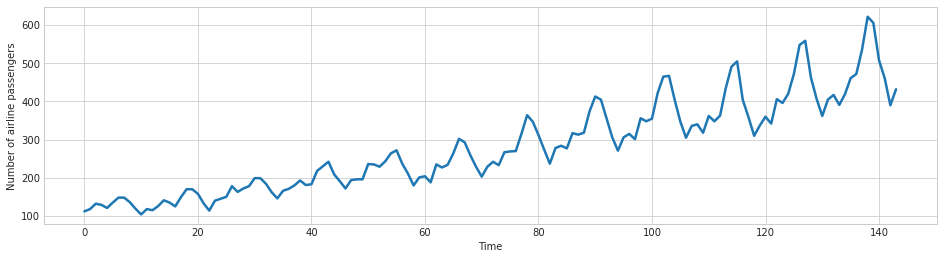

In [3]:
# import the airline data and visualize as line chart
y = load_airline()
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of airline passengers");

### 2.3 Specifying the Forecasting Task

Next we will define a forecasting task. We will try to predict the last 3 years of data, using the previous years as training data. Each point in the series represents a month, so we should hold out the last 36 points as test data, and use 36-step ahead forecasting horizon to evaluate forecasting performance.

We can split the data as follows:

(108,) (36,)


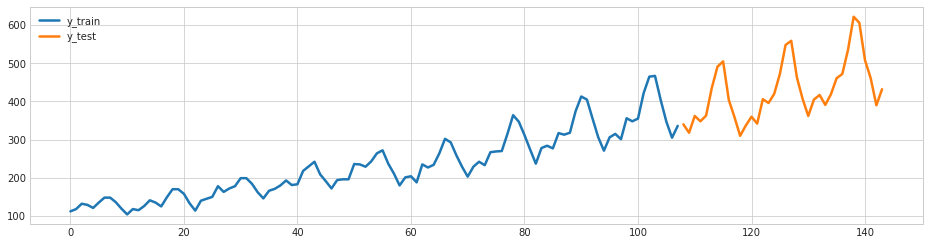

In [4]:
# split the last 3 years (=36 months) the data as testing data
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape, y_test.shape)

### 2.4 Simple Approaches to Forecasting
When we want to generate forecasts, we need to specify the forecasting horizon and pass that to our forecasting algorithm. We can specify the forecasting horizon as a numpy array of the steps ahead relative to the end of the training series:

In [5]:
# specify 36 months forecasting horizon as fh
fh = np.arange(1, len(y_test) + 1)  # we add 1 because the `stop` value is exclusive in `np.arange`
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

Simple or _naïve forecasting strategies_ do not rely on data mining algorithms but simply project given value into the future. There are 2 naïve strategies:
1. We always predict the last value observed (in the training series) into the future.
2. We predict the last value observed in the same season (i.e. last year's February becomes this year's February and so on).

The 1st strategy can be implemented without _sktime_ but simply using Numpy and Pandas.

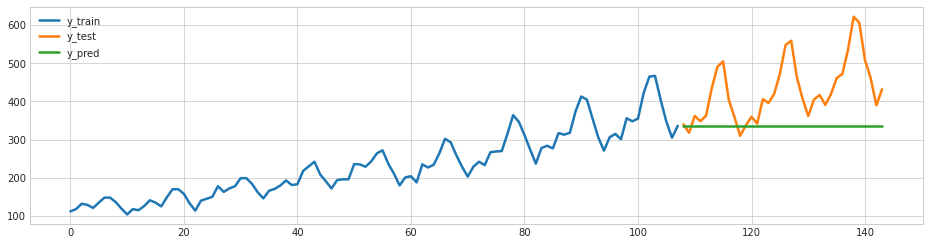

In [6]:
# implement the 1st naive strategy with numpy and pandas 
y_pred = np.repeat(y_train.iloc[-1], len(fh))
y_pred = pd.Series(y_pred, index=y_train.index[-1] + fh)

plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

_sktime_ has a NaiveForecaster. Setting its parameter `strategy="last"` will re-create the same forecast as above.

0.23195770387951434

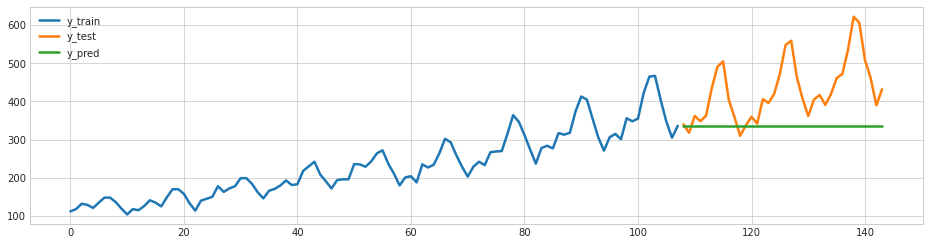

In [7]:
# implement the 1st naive strategy with sktime's NaiveForecaster
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_pred, y_test)

Setting the NaiveForecaster's its parameter `strategy="last"` and seasonal periodicity to `sp=12` will create the 2nd strategy, where it predicts the last value observed in the same season into next season.

0.145427686270316

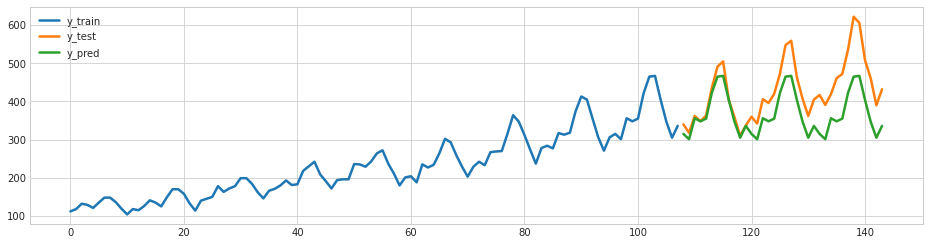

In [8]:
# implement the 2nd strategy with sktime's NaiveForecaster
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

## 3. Why not Scikit-Learn?
### 3.1 Pitfalls with Data Selection and Splitting 
Sklearn's `train_test_split` module assumes that the data is cross-sectional data and can thus be shuffled or randomly split. But this leads to leakage for time-series data where prediction is about forecasting future data points.

In sktime, `temporal_train_test_split` module takes does not shuffle the data before splitting and instead takes as parameter `test_size` a time period of how many of the most recent observations should be be cut off from the training data.  

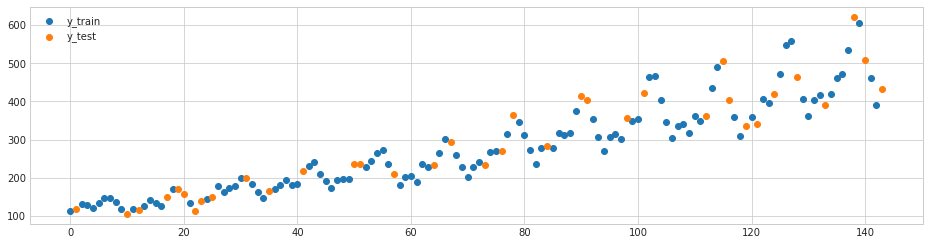

In [9]:
# split the dataset with sklearn's train_test_split
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(y)
plot_ys(y_train.sort_index(), y_test.sort_index(), labels=["y_train", "y_test"]);

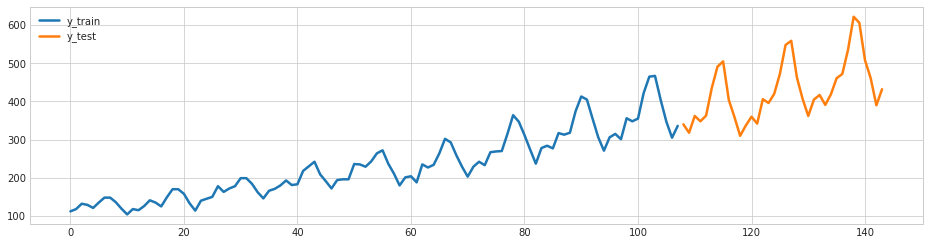

In [10]:
# split the dataset with sktime's temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_ys(y_train, y_test, labels=["y_train", "y_test"]);

### 3.2 Pitfalls with Data Transformation and Modelling
As mentioned before Scikit-Learn has no specialized module for transforming time series data for its supervised learning algorithms. In order to use Scikit-Learn, we have to first transform the data into the required tabular format, then fit a regressor and finally generate forecasts. To solve forecasting via regression, data has to be transformed by process called _reduction_, because we reduce the forecasting task to the simpler but related task of tabular regression. This allows to apply any regression algorithm to the forecasting problem. Reduction to regression works as follows: We cutting the training series into windows of a fixed length and stacking them on top of each other as table. Our target variable consists of the subsequent observation for each window. 

As Scikit-Learn has no module, we have to define our own function to tabularize time series data. The function will be called `split_into_train_test` and will require the following inputs:
- data   = an individual time series
- fh     = number of out of sample points (i.e. the cut-off for the forecasting horizon)
- in_num = number of input points for the forecast

It will return the following outputs:
- x_train, y_train, x_test, y_test

In [11]:
def split_into_train_test(data, in_num, fh):
    
    train, test = data[:-fh], data[-(fh + in_num):]
    x_train, y_train = train[:-1], np.roll(train, -in_num)[:-in_num]
    x_test, y_test = test[:-1], np.roll(test, -in_num)[:-in_num]
#     x_test, y_test = train[-in_num:], np.roll(test, -in_num)[:-in_num]

# reshape input to be [samples, time steps, features] (N-NF samples, 1 time step, 1 feature)
    x_train = np.reshape(x_train, (-1, 1))
    x_test = np.reshape(x_test, (-1, 1))
    temp_test = np.roll(x_test, -1)
    temp_train = np.roll(x_train, -1)
    for x in range(1, in_num):
        x_train = np.concatenate((x_train[:-1], temp_train[:-1]), 1)
        x_test = np.concatenate((x_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return x_train, y_train, x_test, y_test

Below is an example where a series of data is split into matrix as feature_window and the subsquent value in each row becomes the target in the vector called target_window.

In [12]:
# split the time index instead of the actual values to show how the windows are split to tabulaize the data
feature_window, target_window, _, _ = split_into_train_test(y.index.values, 10, len(fh))

In [13]:
print(feature_window[:5, :])
print('...')
print(feature_window[-5:, :])

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
...
[[ 93  94  95  96  97  98  99 100 101 102]
 [ 94  95  96  97  98  99 100 101 102 103]
 [ 95  96  97  98  99 100 101 102 103 104]
 [ 96  97  98  99 100 101 102 103 104 105]
 [ 97  98  99 100 101 102 103 104 105 106]]


In [14]:
print(target_window[:5])
print('...')
print(target_window[-5:])

[10 11 12 13 14]
...
[103 104 105 106 107]


In [15]:
# now split the actual values of the time series
x_train, y_train, x_test, y_test = split_into_train_test(y.values, 10, len(fh))
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (98, 10) (98,)
Testing set shape: (36, 10) (36,)


Although now we can fit the tabularized time series data into any sklearn regressor for forcasting, it still is not a perferct solution as visualization will demonstrate.

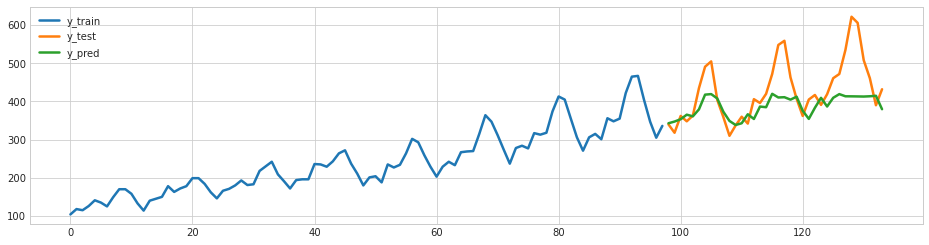

In [16]:
# now the data can be fit into any sklean regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
# make predictions i.e. forecasting
y_pred = model.predict(x_test)
# visualize the results
plt.figure(figsize=(16, 4))
x_axis = np.arange(98, 134, 1)
plt.plot(y_train, color='tab:blue');
plt.plot(x_axis, y_test, color='tab:orange');
plt.plot(x_axis, y_pred, color='tab:green');
plt.legend(('y_train', 'y_test', 'y_pred'));

Data transformation and modelling with Sklearn requires a lot of hand-written code which is often _error-prone, not modular and not tuneable._ 
- not modular means it is hard to change certain components individually (without much more additional coding)
- not tunable as the hyperparameters are not being able optimized

Note also that these steps involve a number of implicit hyper-parameters:
- the way you slice the time series into windows (e.g. the window length)
- the way you generate forecasts (recursive strategy, direct strategy, other hybrid strategies)

### 3.3 Pitfalls with Prediction and Perfomance
The evaluation metrics, R-squared (coefficient of determination for regression) and sMAPE, provide contradicting answers to the performance of the model.

In [17]:
# obtain evalutation metrics
r_squared = model.score(x_test, y_test)
# add back time index to y_test
y_test = pd.Series(y_test, index=y.index[-len(fh):])
smape_score = smape_loss(pd.Series(y_pred, index=y_test.index), y_test)
print("R_squared: %.4f" % r_squared)
print("sMAPE: %.4f " %smape_score)

R_squared: 0.1312
sMAPE: 0.1169 


But what's the problem here?

The model actually does not make a multi-step-ahead forecast up to the 36th step ahead. Instead, it makes 36 single-step-ahead forecasts always using the most recent data. The sMAPE-metric falsely points to high accuracy, while the R-squared suggests dismal accuarcy. 

Obtaining the predictions recursively will also adjust the sMAPE only slightly.

In [18]:
# recursive predictions
predictions = []
last_window = x_train[-1, :].reshape(1, -1)  # make it into 2d array

last_prediction = model.predict(last_window)[0]  # take value from array

for i in range(len(fh)):
    # append prediction
    predictions.append(last_prediction)
    
    # update last window using previously predicted value
    last_window[0] = np.roll(last_window[0], -1)
    last_window[0, (len(last_window[0]) - 1)] = last_prediction
    
    # predict next step ahead
    last_prediction = model.predict(last_window)[0]
y_pred_rec = pd.Series(predictions, index=y_test.index)
smape_score = smape_loss(y_pred_rec, y_test)
print("sMAPE: %.4f " %smape_score)

sMAPE: 0.1444 


As these problems abound for Scikit-Learn's time series analysis capabilities, _sktime_ offers many solutions to these problems and it integrates the familiar tools of Scitkit.
## 4. Forecasting with _sktime_

_sktime_ provides a meta-estimator for this approach, which is: 
- __modular__ and __compatible with scikit-learn__ so that one can easily apply any scikit-learn regressor to solve our forecasting problem,
- __tuneable__: allows one to tune hyper-parameters like the window length or strategy to generate forecasts
- __adaptive__: in the sense that it adapts the scikit-learn's estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

### 4.1 Integrated Interface for Reduction-Regression-Forecasting
The `ReducedRegressionForecaster` module from _sktime_  easily takes as hyperparameters
- regressor = any Sklearn regressor
- window_length = specified number of time window for tabularization/reduction
- strategy = forecasting strategy (e.g. 'direct', 'recursive')

Its methods are similar to a Sklearns `.fit()` or `.predict()`.

In [19]:
# re-load the airline dataset and split
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
print(y_train.shape[0], y_test.shape[0])

108 36


sMAPE: 0.1401 


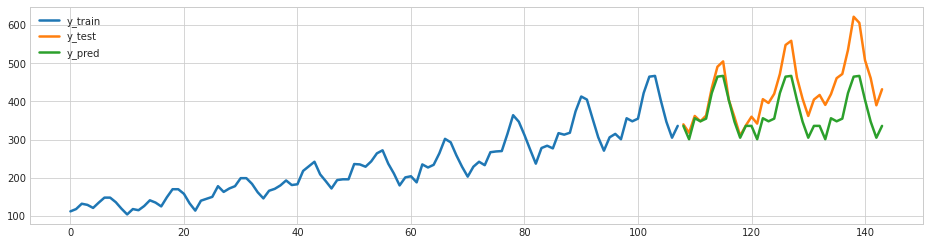

In [20]:
# build a forecasting model with sklearn regressor and sktime forecaster
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=KNR, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

In [21]:
from sktime.forecasting.model_selection import SlidingWindowSplitter
cv = SlidingWindowSplitter(window_length=12, start_with_window=True)
for input_window, output_window in cv.split(y_train.iloc[:20]):
    print(input_window, output_window)

[ 0  1  2  3  4  5  6  7  8  9 10 11] [12]
[ 1  2  3  4  5  6  7  8  9 10 11 12] [13]
[ 2  3  4  5  6  7  8  9 10 11 12 13] [14]
[ 3  4  5  6  7  8  9 10 11 12 13 14] [15]
[ 4  5  6  7  8  9 10 11 12 13 14 15] [16]
[ 5  6  7  8  9 10 11 12 13 14 15 16] [17]
[ 6  7  8  9 10 11 12 13 14 15 16 17] [18]
[ 7  8  9 10 11 12 13 14 15 16 17 18] [19]


### 4.2 Statistical Forecasters
This section showcases how _sktime_ interfaces with exponential smoothing and arima models.

sMAPE: 0.0512 


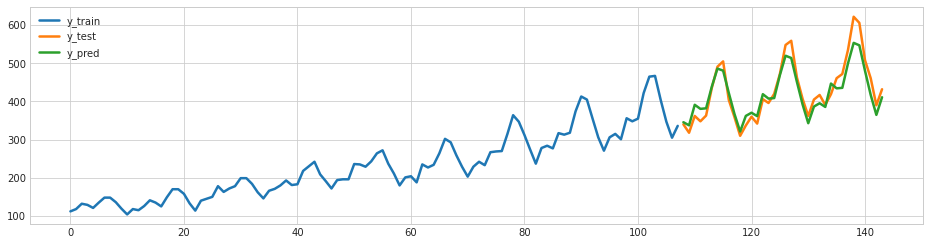

In [22]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

# dataset is monthly data, where the seasonal periodicity (sp) or the number of periods per year is 12

forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

Models for time series data can have many forms and represent different stochastic processes. When modeling variations in the level of a process, three broad classes of practical importance are the autoregressive (AR) models, the integrated (I) models, and the moving average (MA) models. These three classes depend linearly on previous data points. Combinations of these ideas produce _autoregressive integrated moving average_ (ARIMA) models.

_sktime_ can interface _pmdarima_, a package for automatically selecting the best ARIMA model. Since this searches over a number of possible model parametrisations, it may take a bit longer.

In [ ]:
! pip install pmdarima

sMAPE: 0.0412 


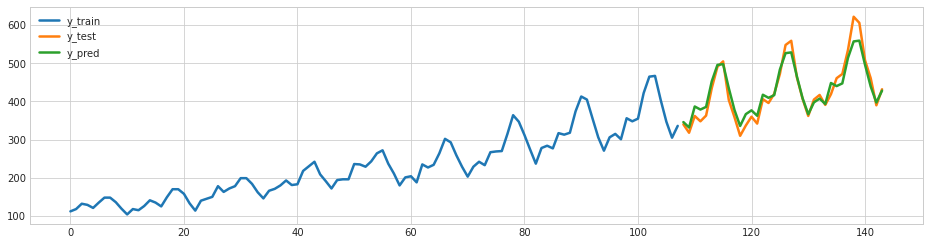

In [23]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

### 4.3 Building and Tuning Composite Models
_sktime_ provides a modular API for composite model building for forecasting.

__Ensembling__

Like Scikit-Learn, _sktime_ provides a meta-forecaster to ensemble multiple forecasting algorithms. For example, we can combine different variants of exponential smoothing as follows:

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


sMAPE: 0.0703 


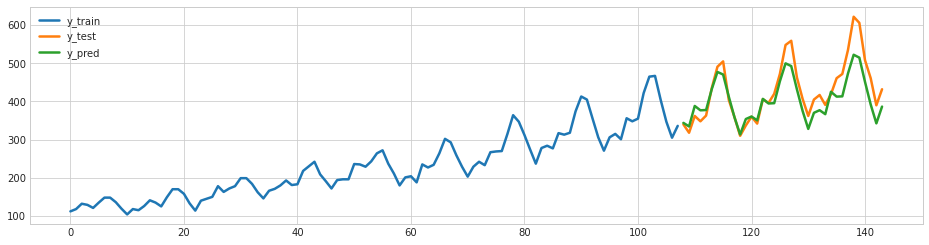

In [24]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

__Tuning__

In the `ReducedRegressionForecaster`, both the `window_length` and `strategy` arguments are hyper-parameters which we may want to optimise. Using Scikit-Learn’s `GridSearchCV`, we can tune imported regressors.

sMAPE: 0.1243 


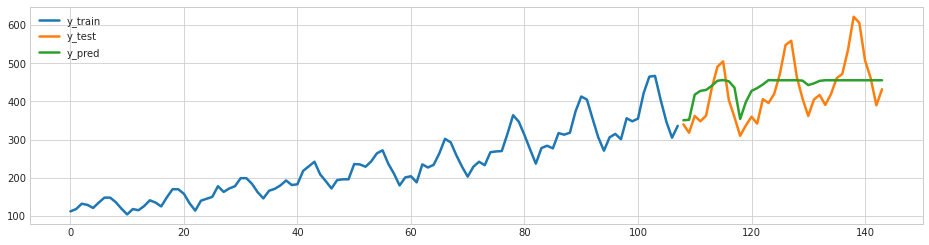

In [25]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sklearn.model_selection import GridSearchCV

# tuning the 'n_estimator' hyperparameter of RandomForestRegressor from scikit-learn
regressor_param_grid = {"n_estimators": [100, 200, 300]}
forecaster_param_grid = {"window_length": [5,10,15,20,25]}

# create a tunnable regressor with GridSearchCV
regressor = GridSearchCV(RandomForestRegressor(), param_grid=regressor_param_grid)
forecaster = ReducedRegressionForecaster(regressor, window_length=15, strategy="recursive")

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

In [26]:
print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)

{'window_length': 15} {'n_estimators': 300}


__Detrending__

Note that so far the reduction approach above does not take any seasonal or trend into account, but we can easily specify a pipeline which first detrends the data.

_sktime_ provides a generic `detrender`, a transformer which uses any forecaster and returns the in-sample residuals of the forecaster’s predicted values. For example, to remove the linear trend of a time series, we can write:

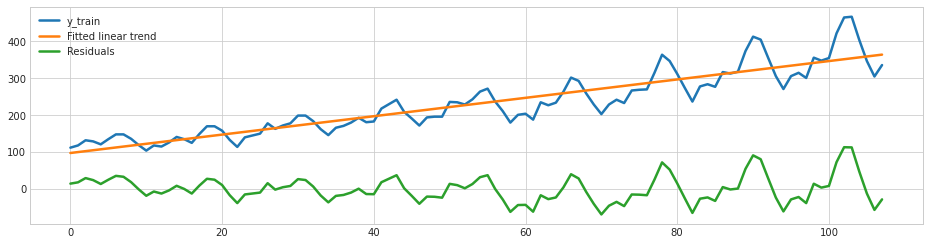

In [27]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# linear detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

__Pipelining__

Let's use the detrender in a pipeline together with de-seasonalisation. Note that in forecasting, when we apply data transformations before fitting, we need to apply the inverse transformation to the predicted values. For this purpose, we provide the following pipeline class:

sMAPE: 0.0553 


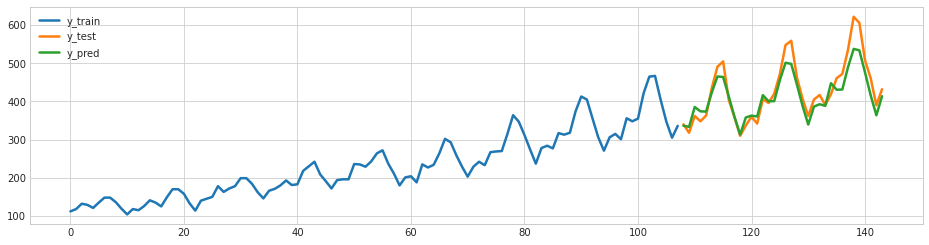

In [28]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)), 
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

### 4.4 Dynamic Forecasting & Prediction Intervals
Below are two other aspects of forecasting: online learning, where we want to _dynamically update forecasts_ as new data comes in, and _prediction intervals_, which allow to quantify the uncertainty of the forecasts.

__Dynamic Forcasting__

For model evaluation, we sometimes want to evaluate multiple forecasts, using temporal cross-validation with a sliding window over the test data. For this purpose, all forecasters in _sktime_ have a `.update_predict()` method. Here we make repeated single-step ahead forecasts over the test set.

Note that the forecasting task is changed: while we still make 36 predictions, we do not predict 36 steps ahead, but instead make 36 single-step-ahead predictions.

In fact, dynamic forecasting is a robust yet uncomplicated method for modelling time series data. As the Makridakis Competitions (or M-Competitions), competition series on forecasting, have clearly shown that when it comes to forecasting simple models win out over overly complicated ones.

sMAPE: 0.0977 


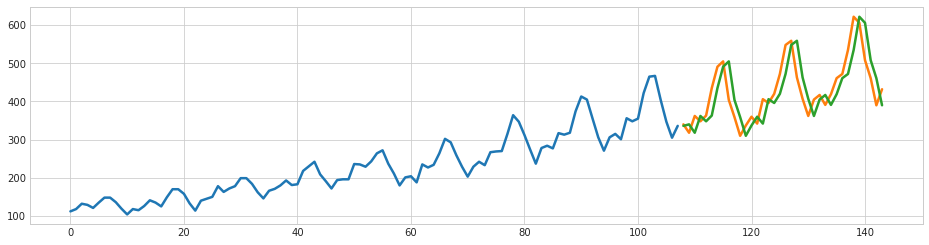

In [29]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
plot_ys(y_train, y_test, y_pred);
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

__Prediction Intervals__

In many cases, we're also interested in prediction intervals. _sktime's_ interface support prediction intervals, but it has not been implemented for all algorithms yet.

It works for the Theta forecasting algorithm:

sMAPE: 0.0866 


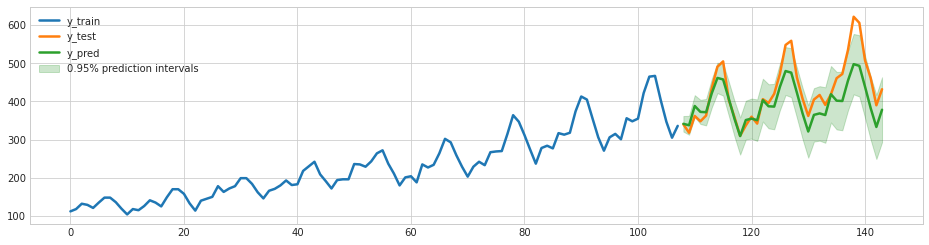

In [30]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_score = smape_loss(y_test, y_pred)
print("sMAPE: %.4f " %smape_score)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();

## 5. Useful Resources
* Introductory information on time series data and analysis are taken from [Time Series](https://en.wikipedia.org/wiki/Time_series), [sMAPE](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error), and [ARIMA model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average).
* For more information on _sktime_, take a look at [creators' paper on forecasting with sktime](https://arxiv.org/abs/2005.08067) in which they discuss the forecasting API in more detail as well as the [sktime website](https://www.sktime.org/en/latest/index.html).
* For a more comprehensive introduction to forecasting, see [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018](https://otexts.com/fpp2/).
* For comparative benchmarking studies/forecasting competitions, see the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) and the currently running [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).